Logistic Regression Example from: https://realpython.com/logistic-regression-python/

Key points:

- train / test split
- standardizing training data with `StandardScaler`
- understand multi_class arg in `LogisticRegression`
- visualizing confusion matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# load data
x, y = load_digits(return_X_y=True)
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [3]:
# split
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=.2, random_state=0)

# standardizing
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# fit model
# NOTE: 'ovr' makes a binary fit for each class
model = LogisticRegression(
    solver='liblinear',
    C=.05,
    multi_class='ovr',
    random_state=0,
)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [4]:
# evaluate
# NOTE: standardizing using scaler trained from x_train
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)
score_train = model.score(x_train, y_train)
score_test = model.score(x_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"confusion matrix: \n {conf_m}")
print(f"report: \n {report}")

confusion matrix: 
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  1  1]
 [ 1  1 33  1  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  1  2  0  0  0  1 33  0]
 [ 0  0  0  1  0  1  0  2  1 36]]
report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

   micro avg       0.94      0.94      0.94

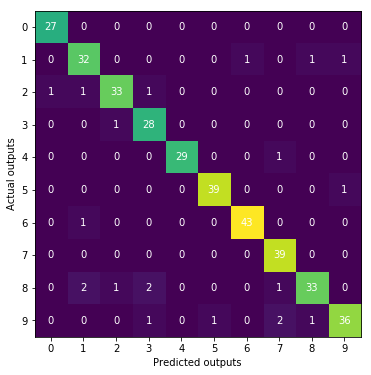

In [5]:
# heatmap for confusion matrx
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(conf_m)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, conf_m[i, j], ha='center', va='center', color='white')
plt.show()